In [134]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import RXGate, RZZGate




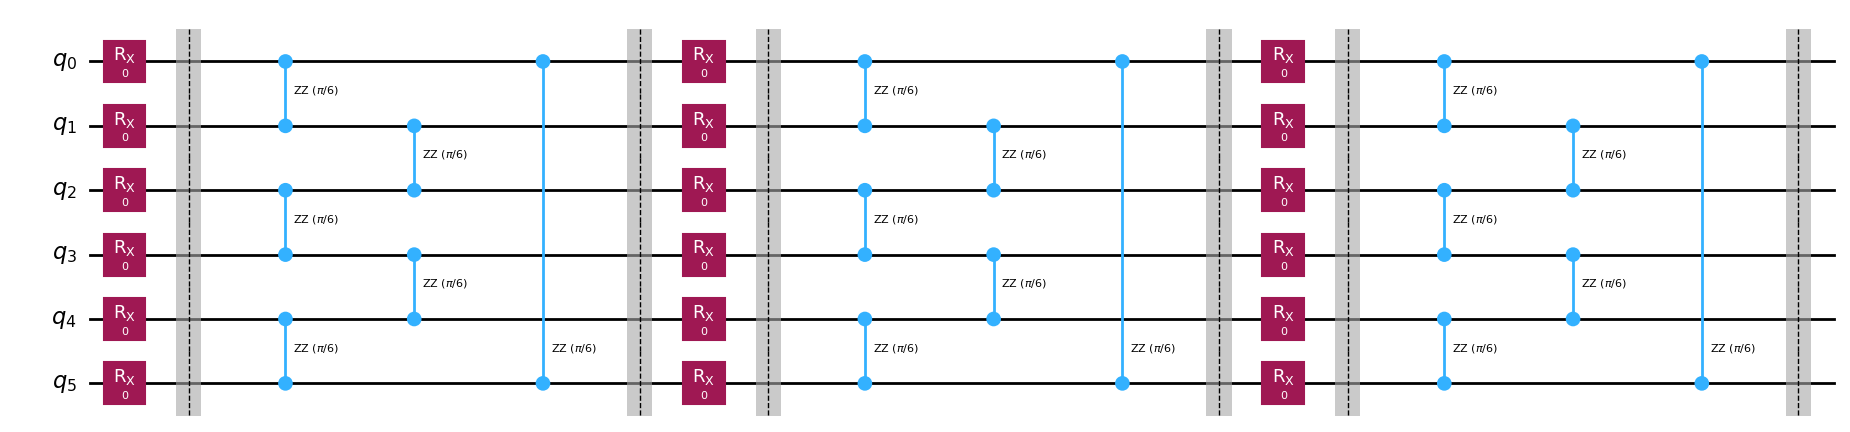

In [135]:

# Create a Quantum Circuit with 6 qubits
qc = QuantumCircuit(6)
angle_rzz = 3.141592653589793/6

# Apply RX gate with angle 0 to each qubit
for i in range(6):
    qc.rx(0, i)
# barrier to separate the gates
qc.barrier()
# Apply RZZ gate with angle 0 between specific pairs of qubits
qc.rzz(angle_rzz, 0, 1)
qc.rzz(angle_rzz, 2, 3)
qc.rzz(angle_rzz, 4, 5)
# Apply RZZ gate with angle 0 again between the same pairs, staggered across the circuit's timeline
qc.rzz(angle_rzz, 1, 2)
qc.rzz(angle_rzz, 3, 4)
# Apply RZZ gate with angle 0 on the last pair of qubits
qc.rzz(angle_rzz, 0, 5)
# barrier to separate the gates
qc.barrier()

# Apply RX gate with angle 0 to each qubit
for i in range(6):
    qc.rx(0, i)
# barrier to separate the gates
qc.barrier()
# Apply RZZ gate with angle 0 between specific pairs of qubits
qc.rzz(angle_rzz, 0, 1)
qc.rzz(angle_rzz, 2, 3)
qc.rzz(angle_rzz, 4, 5)
# Apply RZZ gate with angle 0 again between the same pairs, staggered across the circuit's timeline
qc.rzz(angle_rzz, 1, 2)
qc.rzz(angle_rzz, 3, 4)
# Apply RZZ gate with angle 0 on the last pair of qubits
qc.rzz(angle_rzz, 0, 5)
# barrier to separate the gates
qc.barrier()

# Apply RX gate with angle 0 to each qubit
for i in range(6):
    qc.rx(0, i)
# barrier to separate the gates
qc.barrier()
# Apply RZZ gate with angle 0 between specific pairs of qubits
qc.rzz(angle_rzz, 0, 1)
qc.rzz(angle_rzz, 2, 3)
qc.rzz(angle_rzz, 4, 5)
# Apply RZZ gate with angle 0 again between the same pairs, staggered across the circuit's timeline
qc.rzz(angle_rzz, 1, 2)
qc.rzz(angle_rzz, 3, 4)
# Apply RZZ gate with angle 0 on the last pair of qubits
qc.rzz(angle_rzz, 0, 5)
# barrier to separate the gates
qc.barrier()


# Draw the circuit
qc.draw('mpl', fold=-1)


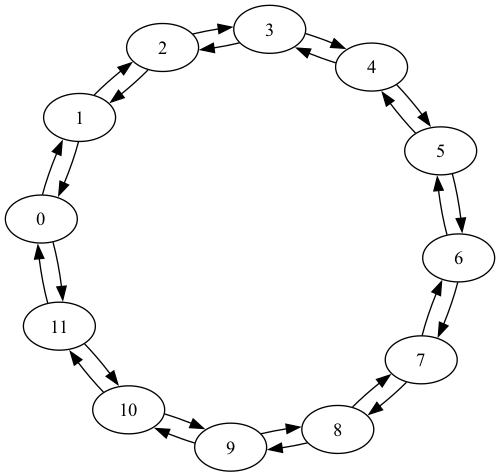

In [136]:
# First, ensure you have Qiskit installed:
# pip install qiskit

from qiskit.transpiler import CouplingMap
import matplotlib.pyplot as plt

# Define the edges based on the heavy hex design
# This is a simplified version for demonstration; adjust according to your specific design

# Create the CouplingMap object
coupling_map = CouplingMap.from_ring(12)

# Visualize the coupling map
coupling_map.draw()

In [137]:
initial_layout = [1,2,5,6,9,10]

In [138]:
from qiskit import transpile

/Users/henryzou/.venvs/qiskit-dev/lib/python3.11/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/henryzou/.venvs/qiskit-dev/lib/python3.11/site-packages/numpy/linalg/linalg.py:2180: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


14


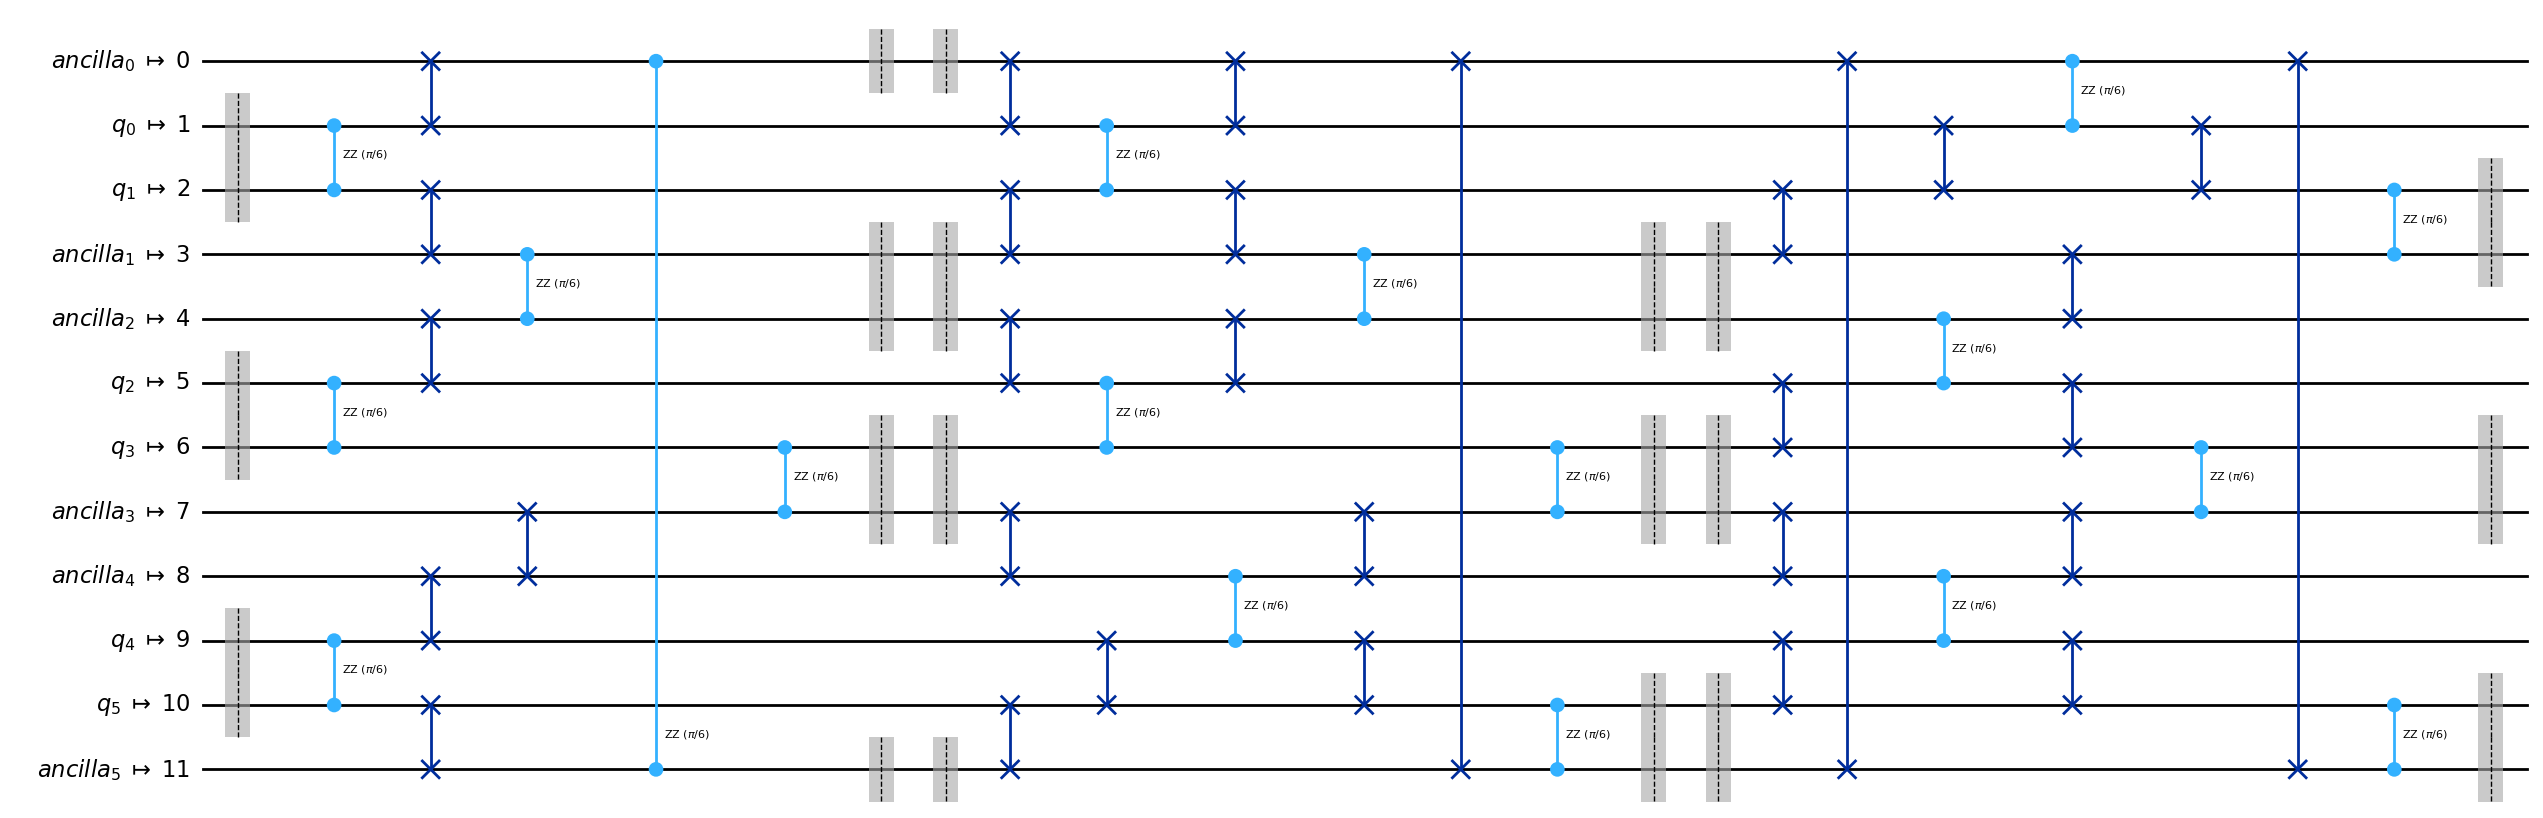

In [139]:
qc_tr = transpile(qc, coupling_map=coupling_map, initial_layout=initial_layout, optimization_level=3)
print(qc_tr.depth())
qc_tr.draw('mpl', fold=-1)

In [147]:
from qiskit.transpiler.passes.routing.sabre_depth import SabreSwap
from qiskit.transpiler.passes import SetLayout, FullAncillaAllocation, EnlargeWithAncilla, ApplyLayout, SabreLayout
from qiskit.transpiler import PassManager


In [141]:
pm = PassManager([
    SetLayout(initial_layout),
    FullAncillaAllocation(coupling_map),
    EnlargeWithAncilla(),
    ApplyLayout(),
    SabreSwap(coupling_map)
])

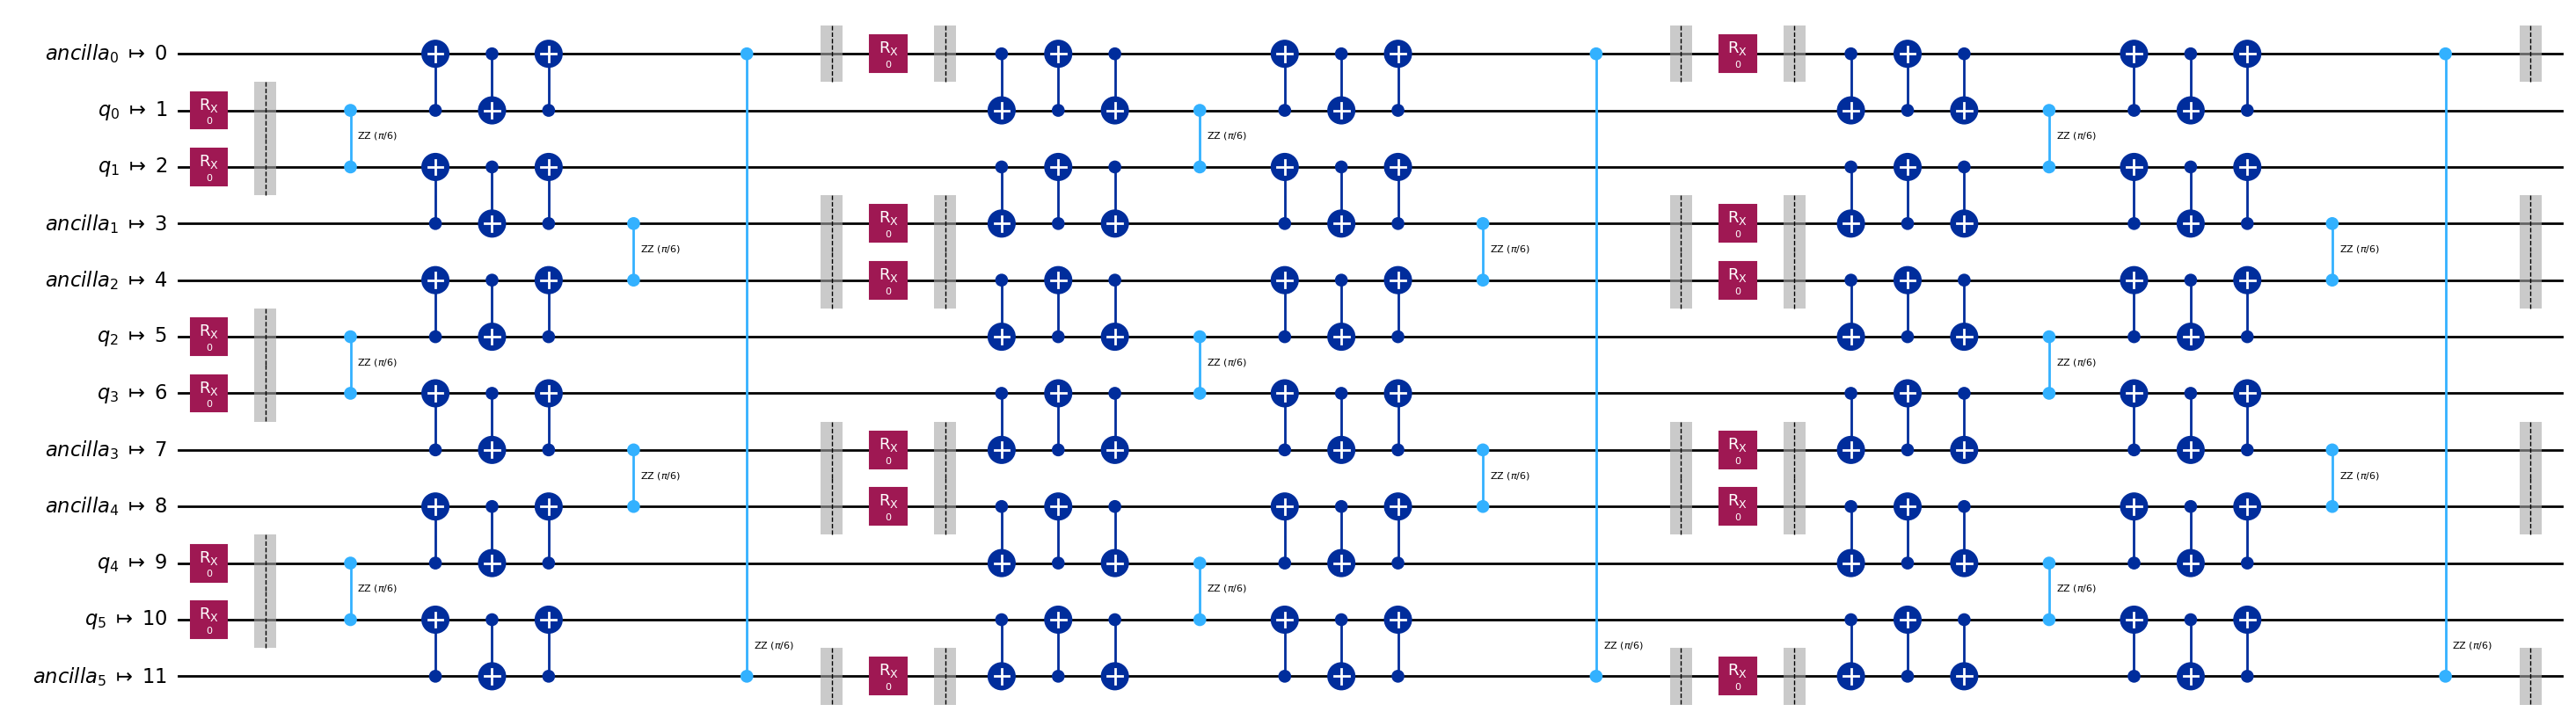

In [145]:
qc_tr_sabre = pm.run(qc)
qc_tr_sabre.draw('mpl', fold=-1)

In [148]:
pm_sabre = PassManager([
    SabreLayout(coupling_map= coupling_map, routing_pass = SabreSwap(coupling_map)),
    FullAncillaAllocation(coupling_map),
    EnlargeWithAncilla(),
    ApplyLayout(),
    SabreSwap(coupling_map)
])

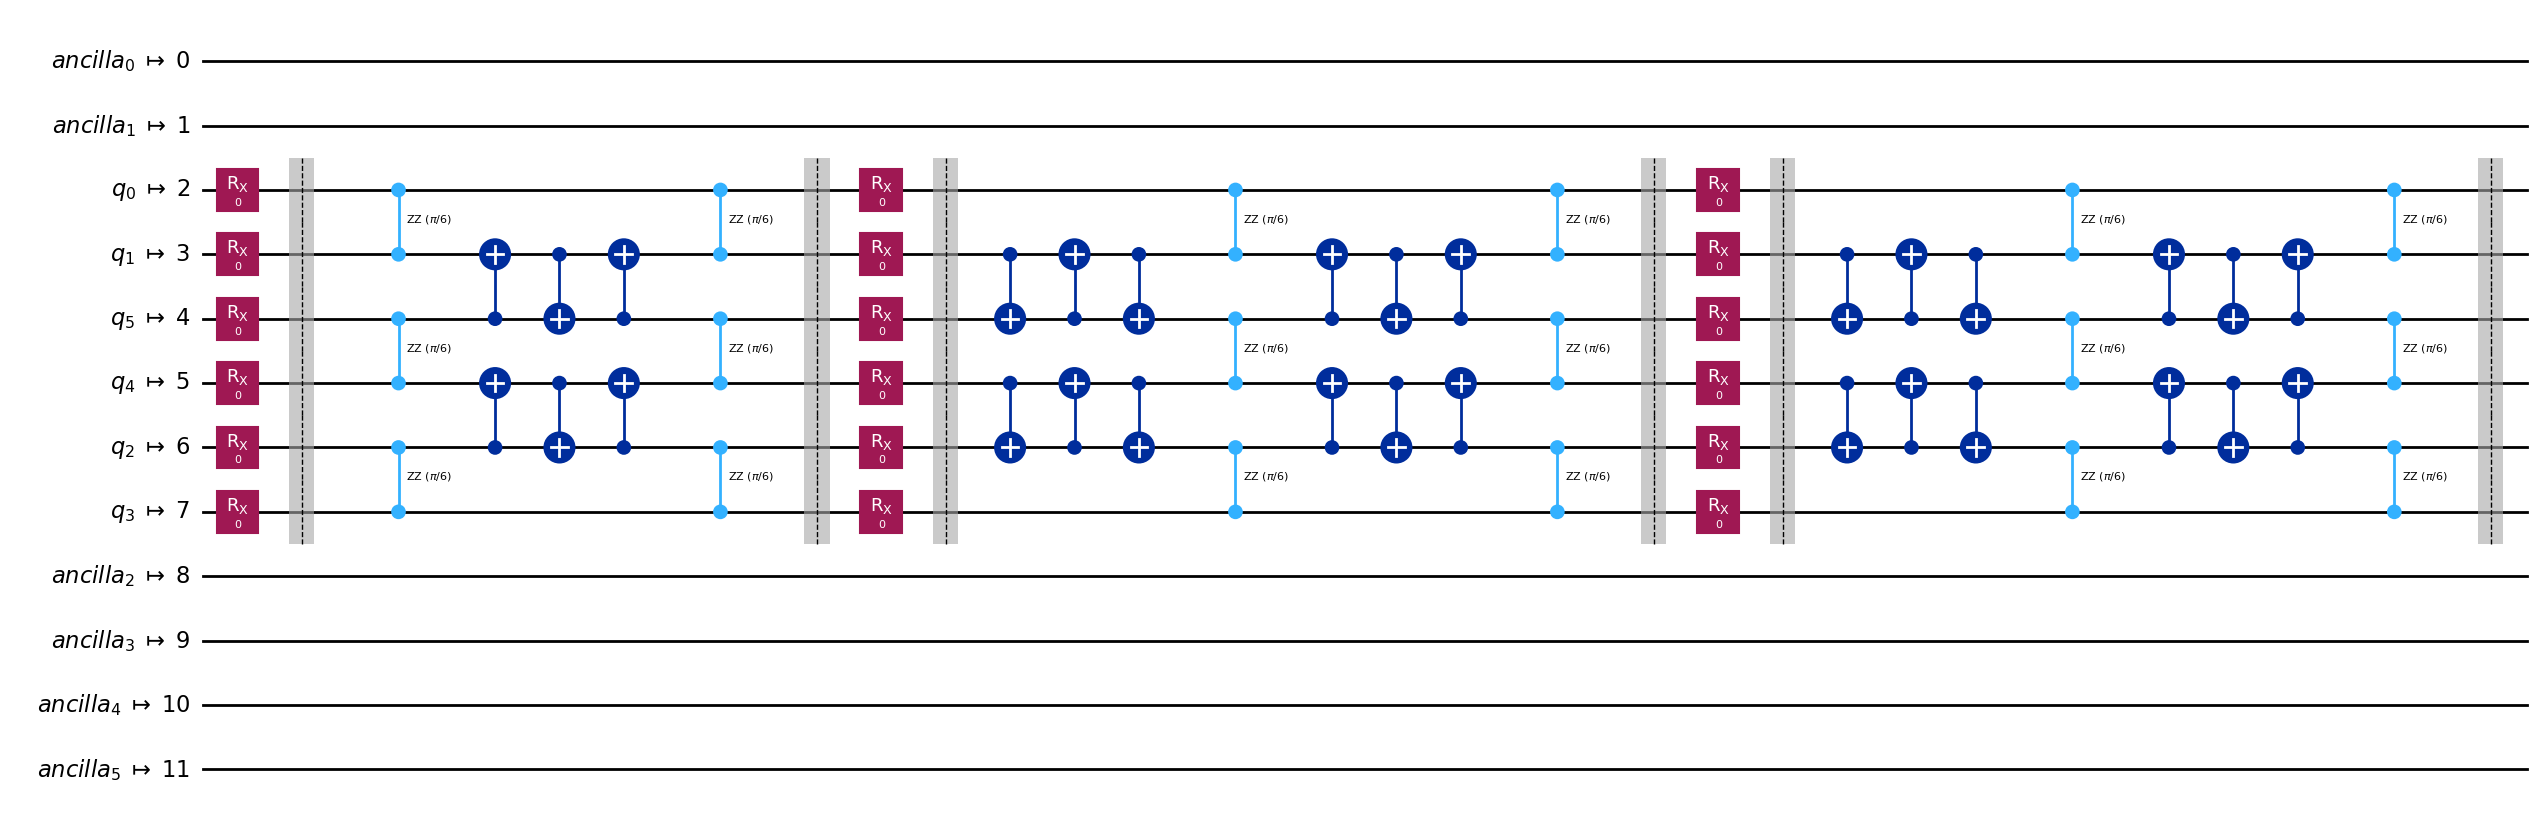

In [163]:
qc_tr_sabre_sabre = pm_sabre.run(qc)
qc_tr_sabre_sabre.draw('mpl', fold=-1)